### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

In [ ]:
# Setup methods
import seaborn as sns
import pandas as pd

from scipy.stats import chi2_contingency

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)


def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [5]:
### Load in penguin dataset
penguin = sns.load_dataset("penguins")

In [6]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### species vs sex

#### hypothese species vs sex
Ik denk dat er geen verband is tussen de twee kolommen.

<AxesSubplot:>

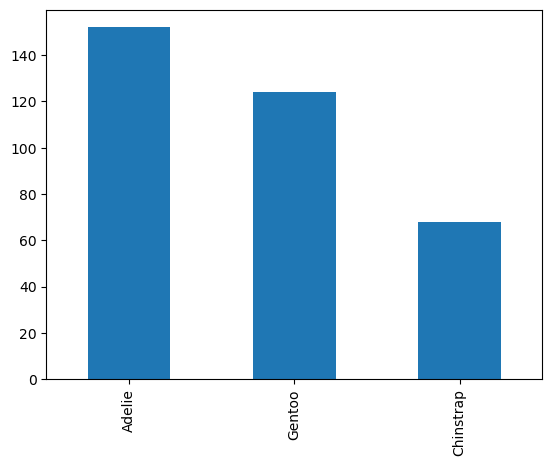

In [28]:
penguin.species.value_counts().plot(kind='bar')

<AxesSubplot:>

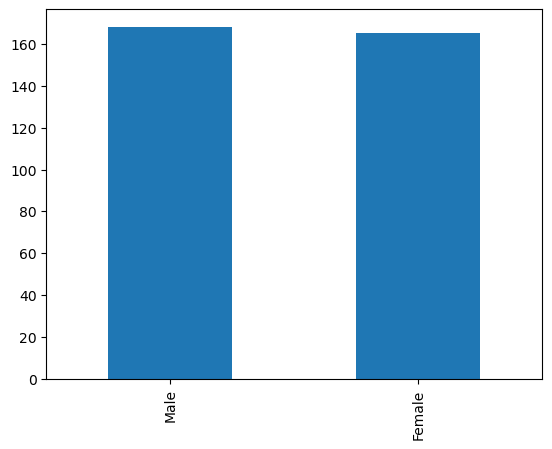

In [29]:
penguin.sex.value_counts().plot(kind='bar')

#### Create a contingency table. Do you observe different ratios between categories here?

In [13]:
speciesSexTable = create_contingency_table(penguin, 'species', 'sex')
print(speciesSexTable)

species  Adelie  Chinstrap  Gentoo
sex                               
Female       73         34      58
Male         73         34      61


#### Conclusie species vs sex
Uit de contingency tabel kan ik afleiden dat in alle drie de eilanden, bijna evenveel mannelijke en vrouwtjes penguins voorkomen.
Behalve op Gentoo, maar het verschil is marginaal.

Ik kan dus concluderen dat er nauwelijks verschil is tussen ratio mannen en vrouwen op de eilanden.
Er is geen verband tussen sex and species.
Dit komt overeen met mijn hypothese.

<AxesSubplot:xlabel='sex'>

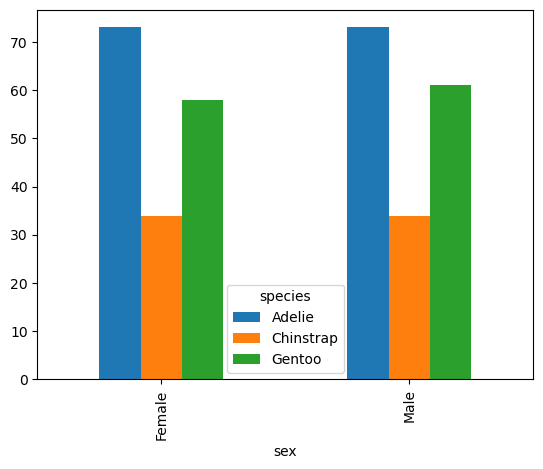

In [14]:
# Create a bar plot
speciesSexTable.plot(kind='bar')

#### chi-squared test species vs sex

In [11]:
check_cat_vs_cat_correlation(penguin, 'species', 'sex')

The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


### island vs sex

#### Mijn hypothese
Tussen island en sex denk ik dat geen verband is tussen de twee kolommen.

In [16]:
islandSexTable = create_contingency_table(penguin, 'island', 'sex')

In [17]:
islandSexTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


<AxesSubplot:>

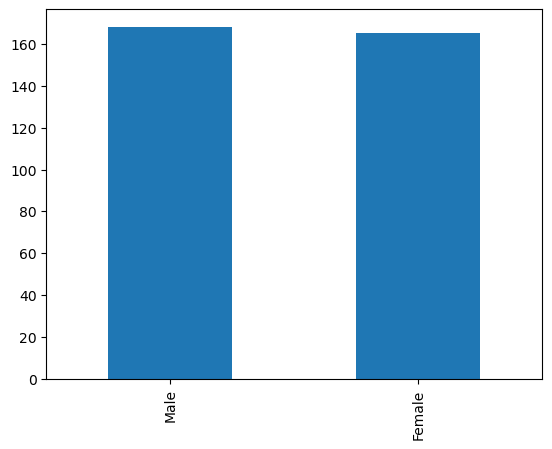

In [26]:
penguin.sex.value_counts().plot(kind='bar')

<AxesSubplot:>

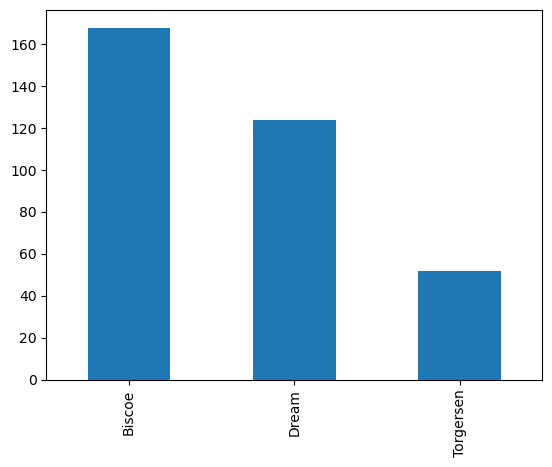

In [27]:
penguin.island.value_counts().plot(kind='bar')

#### Conclusie contigency table island vs sex
Uit de tabel blijkt dat er kleine verschillen zijn tussen het aantal vrouwtjes penguins per eiland, maar dit verschil is echter zeer marginaal.

Ik kan hierop niet concluderen dat er een verband is tussen sex en island.


<AxesSubplot:xlabel='sex'>

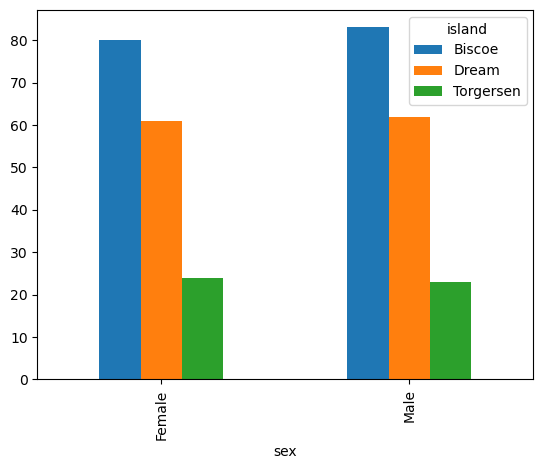

In [19]:
islandSexTable.plot(kind='bar')

Uit de grafiek blijkt dat de verhouding vrouwtjes penguin en mannetjes penguin ongeveer gelijk is per eiland.
Er is geen verband 

In [18]:
check_cat_vs_cat_correlation(penguin, 'island', 'sex')

The odds of a correlation between island and sex is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.


#### Chi-square-test island vs sex
Uit de chi-square test blijkt dat het verband tussen island en sex zeer laag is met 2.84 %.